<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/DataAnalysis-And-MachineLearning/blob/master/7.%20Sentiment%20Analysis/Email%20Spam%20Classification%20Naive%20Bayes%20%26%20SMOTE/Spam_Email_Classification_Naive_Bayes_%26_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# Download Dataset

In [4]:
!kaggle datasets download -d ashfakyeafi/spam-email-classification

Dataset URL: https://www.kaggle.com/datasets/ashfakyeafi/spam-email-classification
License(s): apache-2.0
  0% 0.00/207k [00:00<?, ?B/s]
100% 207k/207k [00:00<00:00, 61.6MB/s]


In [6]:
!unzip /content/spam-email-classification.zip

Archive:  /content/spam-email-classification.zip
  inflating: email.csv               


## Import Dataset

In [7]:
df = pd.read_csv("/content/email.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


# Convert Categories to Binary Format

In [8]:
df['Is_Spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,Is_Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# Split Dependent and Independent Variables and Train/Test Sets

In [48]:
X = df['Message']
y = df['Is_Spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes Model

In [49]:
# Create pipeline for Naive Bayes
nv_pipeline = Pipeline(
    [
        ('vectorizer', TfidfVectorizer()),
        ('nb', MultinomialNB())
    ]
)

# Train naive bayes model
nv_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_nv = nv_pipeline.predict(X_test)

## Confusion Matrix

Text(50.722222222222214, 0.5, 'Actual')

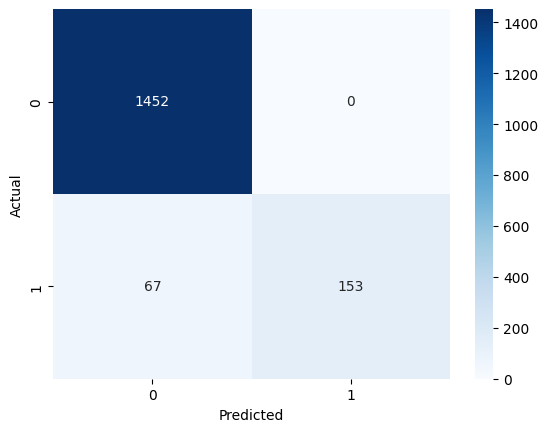

In [50]:
cnf_matrix_nv = confusion_matrix(y_test, y_pred_nv)

sns.heatmap(cnf_matrix_nv, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [14]:
print(classification_report(y_test, y_pred_nv))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       958
           1       0.97      0.92      0.95       157

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



# Train Naive Bayes Model By SMOTE Algorithm

In [80]:
# Convert text to TF-IDF features
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)


smt = SMOTE(random_state=42,sampling_strategy=0.5)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

print(X_train_sm.shape)
print(y_train_sm.shape)

(5061, 8711)
(5061,)


In [81]:
y_train_sm.value_counts()

,count
Is_Spam,
0,3374
1,1687


In [82]:
nb = MultinomialNB()
nb.fit(X_train_sm, y_train_sm)
y_pred_sm = nb.predict(X_test)

## Confusion Matrix

Text(50.722222222222214, 0.5, 'Actual')

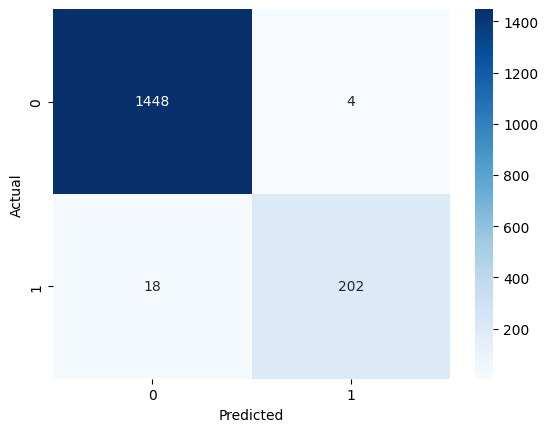

In [83]:
cnf_nb_sm = confusion_matrix(y_test, y_pred_sm)

sns.heatmap(cnf_nb_sm, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [72]:
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1452
           1       0.88      0.94      0.91       220

    accuracy                           0.98      1672
   macro avg       0.94      0.96      0.95      1672
weighted avg       0.98      0.98      0.98      1672

